In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [2]:
dataset=pd.read_csv('D:\Data Science\Data Science\Data Trained\Assignments and Projects\mines-vs-rocks\sonar.all-data.csv', header=None)

In [3]:
dataset.shape

(208, 61)

In [4]:
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [6]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
pd.set_option('precision',3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [8]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

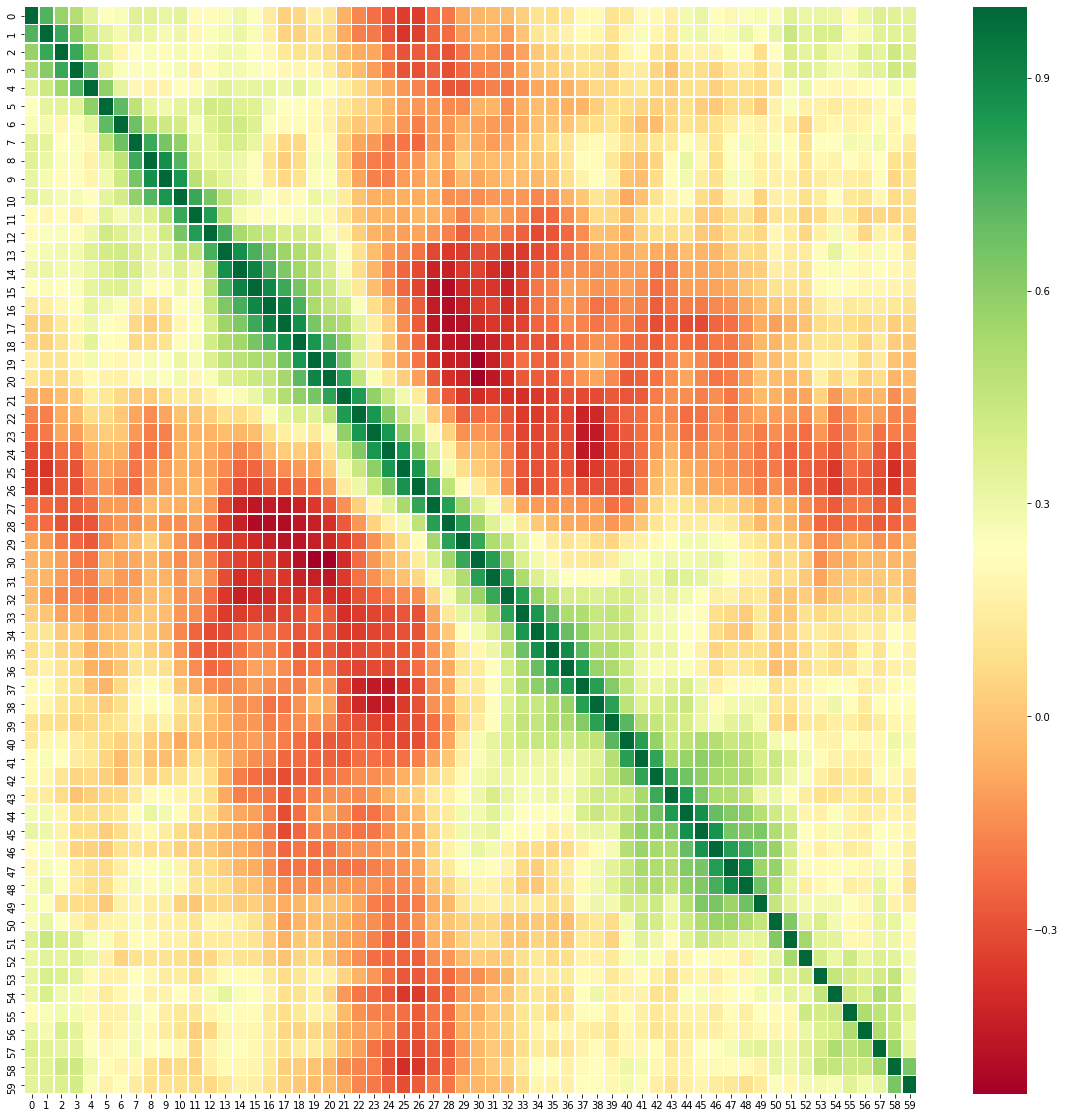

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), cmap='RdYlGn', linewidths=0.5)

In [10]:
#Evaluate Algorithms

In [11]:
X=dataset.drop(60, axis=1)

In [12]:
X.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

In [13]:
X.values

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [14]:
y=dataset[60]

In [15]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [16]:
y.values

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [17]:
#Test Options
test_size=0.2
seed=7
scoring='accuracy'
num_folds=10

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [19]:
#Sport Check on Algortihms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds, random_state=seed)
    cv_results=cross_val_score(model,X_train, y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
DTC: 0.735294 (0.093081)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

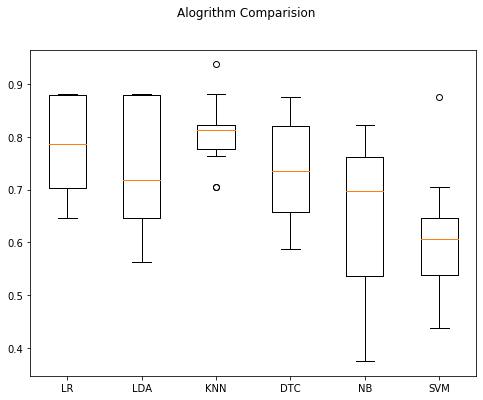

In [21]:
fig=plt.figure()
fig.set_size_inches(8,6)
fig.suptitle('Alogrithm Comparision')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()


In [22]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledDTC',Pipeline([('Scaler', StandardScaler()),('DTC',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))  
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [23]:
results=[]
names=[]
for name, model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train, y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledDTC: 0.687500 (0.097326)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


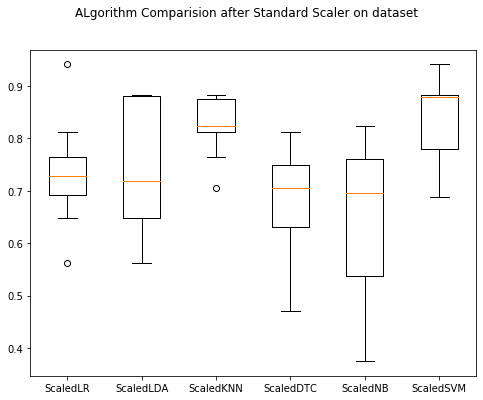

In [24]:
fig=plt.figure()
fig.set_size_inches(8,6)
fig.suptitle('ALgorithm Comparision after Standard Scaler on dataset')
ax=fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [25]:
#Based on above results, we can go ahead with SVM and KNN as both of them are giving better accuracy compared to other models

In [26]:
#KNN Algorithm Tuning
rescaledX=StandardScaler().fit_transform(X_train)
neighbors=[1,3,5,7,9,11,13,15,17,19,21]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)
gridcv=GridSearchCV(estimator=model,param_grid=param_grid, scoring=scoring, cv=kfold)
gridcv_result=gridcv.fit(rescaledX, y_train)

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
print("Best %f using %s" % (gridcv_result.best_score_, gridcv_result.best_params_))
means=gridcv_result.cv_results_['mean_test_score']
stds=gridcv_result.cv_results_['std_test_score']

params=gridcv_result.cv_results_['params']
ranks=gridcv_result.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means,stds,params,ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, std, param ))

Best 0.849398 using {'n_neighbors': 1}
#1 0.849398 (0.059881) with: {'n_neighbors': 1}
#2 0.837349 (0.066303) with: {'n_neighbors': 3}
#2 0.837349 (0.037500) with: {'n_neighbors': 5}
#4 0.765060 (0.089510) with: {'n_neighbors': 7}
#5 0.753012 (0.086979) with: {'n_neighbors': 9}
#6 0.734940 (0.104890) with: {'n_neighbors': 11}
#6 0.734940 (0.105836) with: {'n_neighbors': 13}
#8 0.728916 (0.075873) with: {'n_neighbors': 15}
#10 0.710843 (0.078716) with: {'n_neighbors': 17}
#9 0.722892 (0.084555) with: {'n_neighbors': 19}
#10 0.710843 (0.108829) with: {'n_neighbors': 21}


In [31]:
#SVM ALgorithm
rescaledX=StandardScaler().fit_transform(X_train)
c_values=[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
model=SVC()
kfold=KFold(n_splits=num_folds, random_state=seed)
gridcv=GridSearchCV(model, param_grid=param_grid,scoring=scoring,cv=kfold)
gridcvresult=gridcv.fit(rescaledX, y_train)

C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

In [32]:
print("Best %f %s" %(gridcvresult.best_score_, gridcvresult.best_params_))
means = gridcvresult.cv_results_['mean_test_score']
stds=gridcvresult.cv_results_['std_test_score']
params=gridcvresult.cv_results_['params']
ranks=gridcvresult.cv_results_['rank_test_score']
for mean, std, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with %r:" % (rank, mean, std, param))

Best 0.867470 {'C': 1.5, 'kernel': 'rbf'}
#17 0.759036 (0.098863) with {'C': 0.1, 'kernel': 'linear'}:
#40 0.530120 (0.118780) with {'C': 0.1, 'kernel': 'poly'}:
#39 0.572289 (0.130339) with {'C': 0.1, 'kernel': 'rbf'}:
#36 0.704819 (0.066360) with {'C': 0.1, 'kernel': 'sigmoid'}:
#25 0.746988 (0.108913) with {'C': 0.3, 'kernel': 'linear'}:
#38 0.644578 (0.132290) with {'C': 0.3, 'kernel': 'poly'}:
#16 0.765060 (0.092312) with {'C': 0.3, 'kernel': 'rbf'}:
#32 0.734940 (0.054631) with {'C': 0.3, 'kernel': 'sigmoid'}:
#29 0.740964 (0.083035) with {'C': 0.5, 'kernel': 'linear'}:
#37 0.680723 (0.098638) with {'C': 0.5, 'kernel': 'poly'}:
#12 0.789157 (0.064316) with {'C': 0.5, 'kernel': 'rbf'}:
#25 0.746988 (0.059265) with {'C': 0.5, 'kernel': 'sigmoid'}:
#25 0.746988 (0.084525) with {'C': 0.7, 'kernel': 'linear'}:
#29 0.740964 (0.127960) with {'C': 0.7, 'kernel': 'poly'}:
#11 0.813253 (0.084886) with {'C': 0.7, 'kernel': 'rbf'}:
#21 0.753012 (0.058513) with {'C': 0.7, 'kernel': 'sigmoid'}

In [33]:
#Ensemble Methods

In [38]:
#Boostin Methods
ensembles=[]
ensembles.append(('AB', AdaBoostClassifier()))

ensembles.append(('GBC',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))


In [40]:
results=[]
names=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds, random_state=seed)
    cv_scores=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_scores)
    names.append(name)
    msg=" %s %f (%f)" % (name, cv_scores.mean(), cv_scores.std())
    print(msg)
    

 AB 0.819853 (0.058293)
 GBC 0.848162 (0.106352)


C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

 RF 0.766176 (0.091900)
 ET 0.787132 (0.094913)


C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SANDY1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


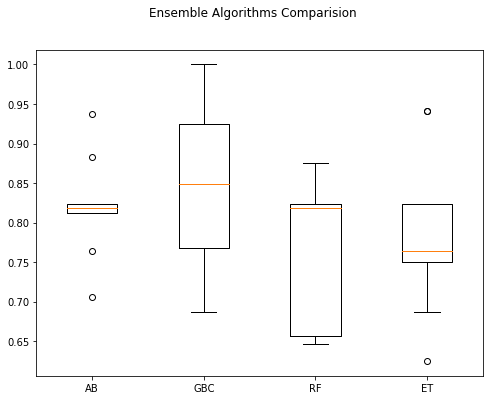

In [44]:
#comparing ensembles algorithms using Box Plots
fig=plt.figure()
fig.set_size_inches(8,6)
fig.suptitle('Ensemble Algorithms Comparision')
ax=fig.add_subplot(111)# 1X1 grid, first subplot
ax.set_xticklabels(names)
plt.boxplot(results)
plt.show()

In [45]:
#Finalzing SVM

In [49]:
#Preparing SVM Model
scaler=StandardScaler()
rescaledX=scaler.fit_transform(X_train)
svm=SVC(C=1.5)#rbf is default kernel
svm.fit(rescaledX, y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
#Model Prediction 
rescaledXtest=scaler.fit_transform(X_test)
y_pred=svm.predict(rescaledXtest)
print("Accuracy Score:") 
print(accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:") 
print(classification_report(y_test, y_pred))
 

Accuracy Score:
0.9047619047619048
Confusion Matrix:
[[24  3]
 [ 1 14]]
Classification Report:
              precision    recall  f1-score   support

           M       0.96      0.89      0.92        27
           R       0.82      0.93      0.87        15

    accuracy                           0.90        42
   macro avg       0.89      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



In [70]:
y_test.values

array(['R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)

In [72]:
y_pred

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)